In [43]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 4)
    return None

In [2]:
data = pd.read_csv('../data/df_houses_full_cleanned.csv')

In [24]:
data.head()

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
0,1719697,2021-05-13 12:16:03,Berlin,Nürnberger Straße,22.0,Pets not allowed,850,1700,38.636364,52.50027,13.33596
1,1716752,2021-05-13 12:16:05,Berlin,Schnellerstraße,90.0,Pets not allowed,450,900,5.000000,52.45495,13.51636
2,1716755,2021-05-13 12:16:07,Berlin,Schnellerstraße,90.0,Pets not allowed,475,950,5.277778,52.45495,13.51636
3,1724139,2021-05-13 12:16:09,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863
4,1721869,2021-05-13 12:16:11,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863


In [32]:
data['pets'].value_counts()

Pets not allowed    1101
Pets negotiable      498
Pets allowed          69
Name: pets, dtype: int64

In [34]:
len(data[data['pets'] == 'Pets not allowed'])

1101

In [58]:
sns.set_palette("YlOrBr")

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


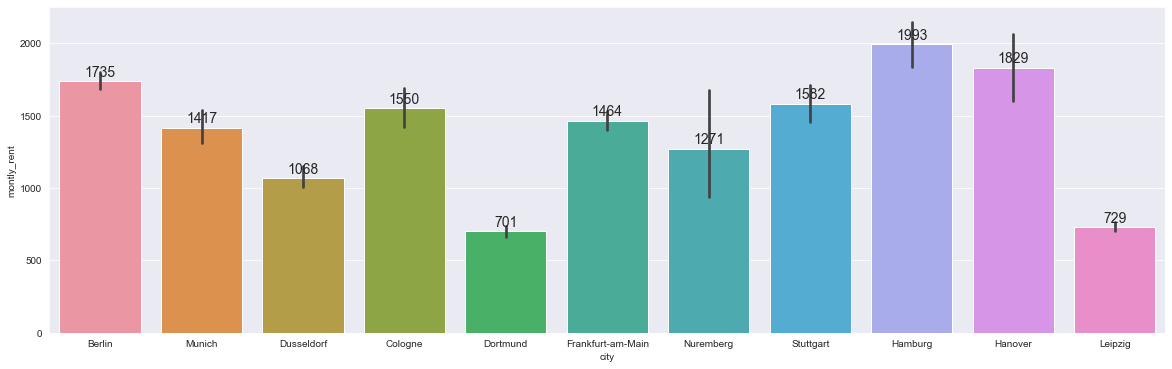

In [93]:

plt.figure(figsize=(20, 6))
sns.set_style("darkgrid")
sns.set_palette("YlOrBr")
ax2 = sns.barplot(data['city'], data['montly_rent'])
annot_plot(ax2)


In [48]:
data.groupby('city')['montly_rent'].mean()

city
Berlin               1735.734114
Cologne              1550.326316
Dortmund              701.000000
Dusseldorf           1068.604396
Frankfurt-am-Main    1464.932476
Hamburg              1993.263158
Hanover              1829.615385
Leipzig               729.500000
Munich               1417.103659
Nuremberg            1271.428571
Stuttgart            1582.187500
Name: montly_rent, dtype: float64

In [164]:
def montly_plot(data):
    plt.figure(figsize=(10, 5))
    plt.title('AVG MONTLY RENT PER CITY', fontsize=12)
    plt.xlabel('')
    plt.ylabel('MONTLY RENT (€)')
    ax = data.groupby('city')['montly_rent'].mean().plot(kind='bar', color='r')
    labels = ['Berlin', 'Munich', 'Dusseldorf', 'Cologne', 'Dortmund',
              'Frankfurt', 'Nuremberg', 'Stuttgart', 'Hamburg',
              'Hanover', 'Leipzig']
    plt.xticks(ticks=labels)    
    plt.savefig(f'../images/teste_NB2.png', dpi=60)
    annot_plot(ax)

ConversionError: Failed to convert value(s) to axis units: ['Berlin', 'Munich', 'Dusseldorf', 'Cologne', 'Dortmund', 'Frankfurt', 'Nuremberg', 'Stuttgart', 'Hamburg', 'Hanover', 'Leipzig']

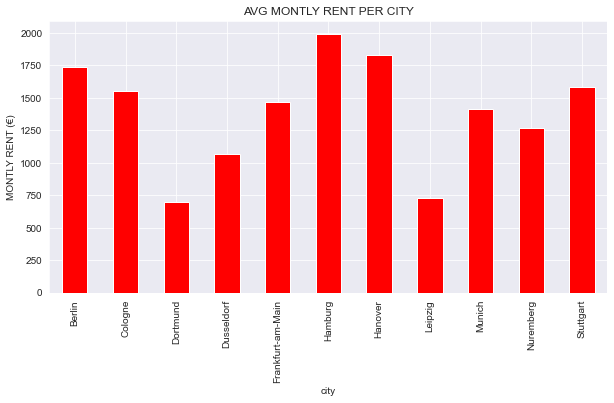

In [165]:
montly_plot(data)

In [143]:
def m2_plot(data):
    ax = data.groupby('city')['m2_value'].mean().plot(kind='bar',
                                                         color='r',
                                                         figsize=(6, 2),
                                                         rot=20)
    plt.title('AVG M² PRICE PER CITY', fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.savefig(f'../images/m2_barplot.png', dpi=100)

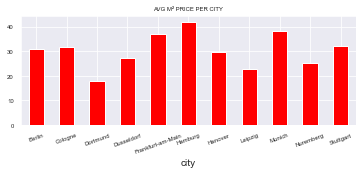

In [144]:
m2_plot(data)

In [154]:
def pet_plot(data):
    ax = data['pets'].value_counts().plot(kind='bar',
                                     color='r',
                                     figsize=(6, 2),
                                     rot=0,
                                     title='Pets')
    annot_plot(ax)
    plt.savefig()
    return None

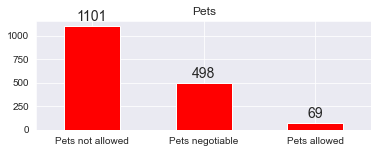

In [155]:
pet_plot(data)

In [166]:
data['city'].unique()

array(['Berlin', 'Munich', 'Dusseldorf', 'Cologne', 'Dortmund',
       'Frankfurt-am-Main', 'Nuremberg', 'Stuttgart', 'Hamburg',
       'Hanover', 'Leipzig'], dtype=object)